<a href="https://www.kaggle.com/code/rashikaaagupta/ice-cube?scriptVersionId=130081618" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/icecube-neutrinos-in-deep-ice/train_meta.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/sample_submission.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/test_meta.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/sensor_geometry.csv
/kaggle/input/icecube-neutrinos-in-deep-ice/test/batch_661.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_240.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_295.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_158.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_35.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_145.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_476.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_449.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_104.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_419.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_136.par

In [2]:
#importing all the necessary libraries
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import plotly.express as px
import numpy as np
import pandas as pd
import os
import seaborn as sns

There are batches of datasets 
and train_meta.parquet, test_meta ans sensor geometry.
Let's explore these.
### exploring the sensor geometry 

In [3]:
sensor_geo = pd.read_csv('/kaggle/input/icecube-neutrinos-in-deep-ice/sensor_geometry.csv')

In [4]:
sensor_geo.describe()

,sensor_id,x,y,z
count,5160.000000,5160.000000,5160.000000,5160.000000
mean,2579.500000,5.870829,-2.518609,-23.905766
std,1489.708025,285.151213,269.409729,296.456563
min,0.000000,-570.900000,-521.080000,-512.820000
25%,1289.750000,-224.090000,-209.070000,-283.200000
50%,2579.500000,16.990000,-6.055000,-35.115000
75%,3869.250000,224.580000,211.660000,228.557500
max,5159.000000,576.370000,509.500000,524.560000


There are 
* 5160 sensors
* across x = 576 to x = - 570, y = -521 to + 509, z = -512 to +524

In [5]:
print(sensor_geo.nunique())

sensor_id    5160
x             118
y             117
z            4975
dtype: int64


* Seems to be spread acorss x and y but along the z axis 

In [6]:
sensor_geo.head()

,sensor_id,x,y,z
0,0,-256.14,-521.08,496.03
1,1,-256.14,-521.08,479.01
2,2,-256.14,-521.08,461.99
3,3,-256.14,-521.08,444.97
4,4,-256.14,-521.08,427.95


In [7]:
fig = px.scatter_3d(x = sensor_geo['x'], y = sensor_geo['y'], z = sensor_geo['z'],color = sensor_geo['z'], opacity=0.5)# mode = 'markers',

fig.update_traces(marker_size=2)
fig.show()

Shows where the sensors arew placed 

Loading the dataset and looking how they look

In [8]:
train_meta = pd.read_parquet('/kaggle/input/icecube-neutrinos-in-deep-ice/train_meta.parquet')

each batch has 200000 values

There are 660 batches

There is train_meta which has information about the batch_id, event_id, first_pulse, last_pulse, azimuth, zenith angles
bath_ids 0->660
There are 200,000 of each. With each of these batches we see first_pulse_index = last_pulse+1

In [9]:
train_meta.head()

,batch_id,event_id,first_pulse_index,last_pulse_index,azimuth,zenith
0,1,24,0,60,5.029555,2.087498
1,1,41,61,111,0.417742,1.549686
2,1,59,112,147,1.160466,2.401942
3,1,67,148,289,5.845952,0.759054
4,1,72,290,351,0.653719,0.939117


In [10]:
batch_1 = pd.read_parquet('/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_1.parquet')

In [11]:
batch_1.head()

,sensor_id,time,charge,auxiliary
event_id,,,,
24,3918,5928,1.325,True
24,4157,6115,1.175,True
24,3520,6492,0.925,True
24,5041,6665,0.225,True
24,2948,8054,1.575,True


In [12]:
batch_1.tail()

,sensor_id,time,charge,auxiliary
event_id,,,,
3266196,1961,17617,0.975,True
3266196,36,17705,0.625,True
3266196,356,18192,0.725,True
3266196,2826,18609,0.575,True
3266196,5013,18741,1.375,True


Let's compare the batch_! dataset with the meta dataset that has batch id of 1

All the event ids from meta atleast for batch 1 is unique. 

In [13]:
batch_2 = pd.read_parquet('/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_2.parquet')

In [14]:
batch_2.head()

,sensor_id,time,charge,auxiliary
event_id,,,,
3266199,208,6003,0.425,True
3266199,316,6086,1.275,True
3266199,1889,6811,1.175,True
3266199,2724,6816,1.025,True
3266199,1628,6966,1.225,True


In [15]:
batch_2.tail()

,sensor_id,time,charge,auxiliary
event_id,,,,
6517807,2284,17879,0.525,True
6517807,4752,18217,0.975,True
6517807,4918,18305,0.675,True
6517807,4918,18318,0.675,True
6517807,555,18357,1.175,True


let's look at the batch number 1 specific information from the train set

In [16]:
batch1FromTrain = train_meta[train_meta['batch_id'] == 1]

In [17]:
batch1FromTrain.head()

,batch_id,event_id,first_pulse_index,last_pulse_index,azimuth,zenith
0,1,24,0,60,5.029555,2.087498
1,1,41,61,111,0.417742,1.549686
2,1,59,112,147,1.160466,2.401942
3,1,67,148,289,5.845952,0.759054
4,1,72,290,351,0.653719,0.939117


Each training dataset has batches and events information and each batch df has sensor id information, 

In [18]:
batch_1.loc[24]

,sensor_id,time,charge,auxiliary
event_id,,,,
24,3918,5928,1.325,True
24,4157,6115,1.175,True
24,3520,6492,0.925,True
24,5041,6665,0.225,True
24,2948,8054,1.575,True
...,...,...,...,...
24,3452,17812,0.725,True
24,48,18053,0.975,True
24,3267,18095,1.125,True


we see that the event id 24 gives 61 rows which is same as the lastpulse index - first  plulse index. 
for every pulse we get the time when it happens, charge deposition, and sensor_id information that is the detector triggered.

Let's add this information on the training data

In [19]:
batch1FromTrain['nTimes']  = batch1FromTrain['last_pulse_index'] - batch1FromTrain['first_pulse_index'] + 1


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
batch1FromTrain.head()

,batch_id,event_id,first_pulse_index,last_pulse_index,azimuth,zenith,nTimes
0,1,24,0,60,5.029555,2.087498,61
1,1,41,61,111,0.417742,1.549686,51
2,1,59,112,147,1.160466,2.401942,36
3,1,67,148,289,5.845952,0.759054,142
4,1,72,290,351,0.653719,0.939117,62


In [21]:
batch1FromTrain.nTimes.value_counts()

47       3829
50       3801
48       3797
49       3793
46       3778
         ... 
92820       1
76341       1
11335       1
4673        1
3321        1
Name: nTimes, Length: 2797, dtype: int64

it seems for batch 1 the max nTimes is 47 

In [22]:
batch1FromTrain[batch1FromTrain['nTimes'] == 47]

,batch_id,event_id,first_pulse_index,last_pulse_index,azimuth,zenith,nTimes
105,1,1676,17950,17996,5.868945,1.729952,47
209,1,3401,43185,43231,2.976005,2.044129,47
228,1,3801,45104,45150,2.555956,1.236129,47
239,1,3953,45812,45858,5.074245,2.177710,47
264,1,4404,47315,47361,4.836330,0.730326,47
...,...,...,...,...,...,...,...
199633,1,3260578,32650496,32650542,1.379772,2.774155,47
199710,1,3261586,32658350,32658396,2.642373,1.212656,47
199814,1,3263055,32734799,32734845,2.542519,0.543064,47
199849,1,3263742,32738666,32738712,5.431146,2.155081,47


let's randomly choose the 1st row i.e event id corresponding to 1676 
look at infomration from batch 1 

In [23]:
#resetiing index
batch_1 = batch_1.reset_index()

In [24]:
#batch_1.loc[1676]
#there should be 47 rows, givinh information of what sensors are triggered. 
# there positions and angles it makes

In [25]:
batch_1.head()

,event_id,sensor_id,time,charge,auxiliary
0,24,3918,5928,1.325,True
1,24,4157,6115,1.175,True
2,24,3520,6492,0.925,True
3,24,5041,6665,0.225,True
4,24,2948,8054,1.575,True


In [26]:
#merging the dataframes
batch_1_sensor_info = batch_1.merge(sensor_geo, on='sensor_id') #here we are losing eleements from the batch_1 

In [27]:
batch_1_sensor_info.head()

,event_id,sensor_id,time,charge,auxiliary,x,y,z
0,24,3918,5928,1.325,True,303.41,335.64,206.58
1,2743,3918,10813,0.975,True,303.41,335.64,206.58
2,3007,3918,10290,0.925,False,303.41,335.64,206.58
3,3007,3918,10515,0.625,False,303.41,335.64,206.58
4,3007,3918,10688,0.925,False,303.41,335.64,206.58


In [28]:
batch_1_sensor_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32792416 entries, 0 to 32792415
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   int64  
 1   sensor_id  int16  
 2   time       int64  
 3   charge     float64
 4   auxiliary  bool   
 5   x          float64
 6   y          float64
 7   z          float64
dtypes: bool(1), float64(4), int16(1), int64(2)
memory usage: 1.8 GB


In [29]:
#this is the merged dfs
batch_1_sensor_info = pd.merge(batch_1, sensor_geo, on='sensor_id', how='left')

In [30]:
batch_1_sensor_info.head()

,event_id,sensor_id,time,charge,auxiliary,x,y,z
0,24,3918,5928,1.325,True,303.41,335.64,206.58
1,24,4157,6115,1.175,True,-145.45,374.24,212.73
2,24,3520,6492,0.925,True,505.27,257.88,-174.60
3,24,5041,6665,0.225,True,-9.68,-79.50,181.00
4,24,2948,8054,1.575,True,576.37,170.92,357.88


In [31]:
#let us choose randome event_id and understand
batch_1_eventid67 = batch_1_sensor_info[batch_1_sensor_info['event_id'] == 67]

In [32]:
batch_1_eventid67

,event_id,sensor_id,time,charge,auxiliary,x,y,z
148,67,5060,6751,0.675,True,-9.68,-79.50,-226.50
149,67,2420,7308,0.575,True,-526.63,-15.60,162.25
150,67,2420,7320,0.875,True,-526.63,-15.60,162.25
151,67,1968,7377,0.425,True,-324.39,-93.43,-316.86
152,67,2989,7655,1.375,True,576.37,170.92,-339.97
...,...,...,...,...,...,...,...,...
285,67,1890,26683,1.675,True,-447.74,-113.13,-9.95
286,67,3624,26961,1.075,True,-313.60,237.44,92.70
287,67,1928,27065,1.075,True,-324.39,-93.43,363.97
288,67,4680,27100,0.425,True,31.25,-72.93,188.29


In [33]:
#let's see how things look like in the training dataset of batch 1 with event id 67


should remove the aux with true since that corresposnsd to background or noise

In [34]:
batch_1_eventid67 = batch_1_eventid67.drop(['sensor_id'], axis = 1) #since already have x,y,z

<string>:6: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

<string>:6: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



<AxesSubplot:xlabel='auxiliary', ylabel='Count'>

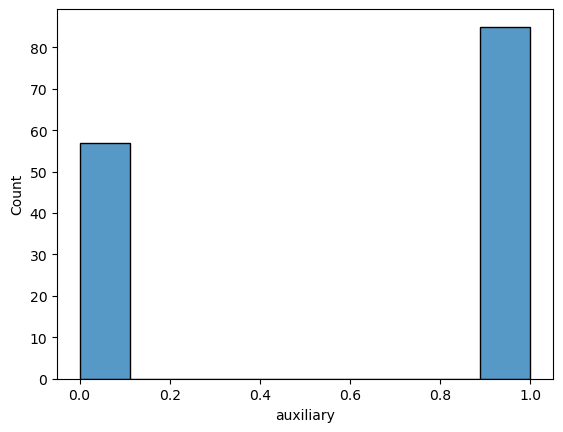

In [35]:
sns.histplot(batch_1_eventid67['auxiliary'])

In [36]:
batch_1_eventid67

,event_id,time,charge,auxiliary,x,y,z
148,67,6751,0.675,True,-9.68,-79.50,-226.50
149,67,7308,0.575,True,-526.63,-15.60,162.25
150,67,7320,0.875,True,-526.63,-15.60,162.25
151,67,7377,0.425,True,-324.39,-93.43,-316.86
152,67,7655,1.375,True,576.37,170.92,-339.97
...,...,...,...,...,...,...,...
285,67,26683,1.675,True,-447.74,-113.13,-9.95
286,67,26961,1.075,True,-313.60,237.44,92.70
287,67,27065,1.075,True,-324.39,-93.43,363.97
288,67,27100,0.425,True,31.25,-72.93,188.29


In [37]:
# here above we are looking at the event id = 67 which  riggered 142 sensors including the 

we observe that various sensor ids are

for a particular batch let's look at the event id and what could it possibly mean

There are batch ids mentioned in the train_meta that are
* 660 batch ids
    * these batch id have event ids and, first_pulse_index and last_pulse_index for a specific event
    * Frequency  of event_id in a fixed batch is same as first_pulse_index - last_pulse_index
    * These event_id stores  the information of all the sensor numbers that were triggered, at time t and deposits charge e

We have
* train_meta -> batches, the angle with it enters for an event
* batch_n -> contains all the sensor number that gets triggered with increasing time and, charge deposited
* sensor_geometry -> sensors id and where they are located

In [38]:
train_meta['nTimes'] = (train_meta.last_pulse_index - train_meta.first_pulse_index) +1

In [39]:
train_meta.head()

,batch_id,event_id,first_pulse_index,last_pulse_index,azimuth,zenith,nTimes
0,1,24,0,60,5.029555,2.087498,61
1,1,41,61,111,0.417742,1.549686,51
2,1,59,112,147,1.160466,2.401942,36
3,1,67,148,289,5.845952,0.759054,142
4,1,72,290,351,0.653719,0.939117,62


Need to predict in which direction the neutrino came. 
it could be upwards or downwards. hen we know whereve the other neutrinos came from they  moved and riggered so many other sensors. 
1.since we have x,y,z and itis a point particle
we could find the slopes for each event id and put them in the training dataset 
and then use that to evaluate \theta and \phi

2. but, het what if it is not straight line but, a zig zag path with some mean free path. so we could just take the true signal and use that to estimate things. 


(It is also interesting to see we are looking at the connection between a random initial angle in which direction it came and all the subsequuent sensors it hit. 
something that can be used in the research ) 


## mean free path 

1. choose particular event
2. remove the noise signals
3. just estimate the mean free path from the x,y,z corresponding to the true signa. 
use that distance parameter in the training dataset 

In [40]:
batch_1_eventid67 = batch_1_eventid67[batch_1_eventid67['auxiliary'] == False] #getting rid of the noise
#droppping the event id and aux 
batch_1_eventid67.drop(['event_id','auxiliary'], axis = 1)

,time,charge,x,y,z
163,9863,1.025,114.39,-461.99,-28.98
164,9890,0.725,114.39,-461.99,-46.00
165,9892,0.675,114.39,-461.99,-46.00
166,9920,1.125,114.39,-461.99,-63.02
167,9929,0.425,114.39,-461.99,-28.98
183,11845,0.825,282.18,-325.74,-318.55
185,11950,0.625,282.18,-325.74,-335.57
203,18533,0.475,124.97,-131.25,306.43
204,18537,1.025,124.97,-131.25,306.43
205,18557,1.075,124.97,-131.25,323.45


In [41]:
def meanFreePath(df):
    dx = df['x'].diff()
    dy = df['y'].diff()
    dz = df['z'].diff()

# Calculate the squared distances for each coordinate difference
    distance_squared = dx**2 + dy**2 + dz**2

# Calculate the average distance traveled
    avg_distance = np.sqrt(distance_squared.mean())

    return avg_distance

In [42]:
#finding mean free path, avg charge, avg time 
evt67_charge= batch_1_eventid67['charge'].mean()
#evt67_time  = batch_1_eventid67['time', -1]
evt67_path  = meanFreePath(batch_1_eventid67)


In [43]:
evt67_charge

0.9837719332753566

looking at how \theta and \phi hanges as well throughout the system for an event 

In [44]:
def angles(df):
    df['theta'] = np.arccos(df['z'])
    df['azimuthal'] = np.df['x']**2 + df['y']**2